# Morphological Image Processing
* In this notebook, I explored Morphological Image Processing which is a branch of image processing that leverages tools and techniques from Mathematical Morphology to manipulate and analyze images. It involves applying various Morphological Operators to an input image to extract or enhance specific features.
* These operators often use binary or grayscale structuring elements, which are small shape templates moved over the image, somewhat akin to convolution filters.

## skimage Operations

The skimage (scikit-image) library provides a range of morphological operations, including:

- **Erosion:** This operation shrinks or erodes the boundaries of foreground objects.
- **Dilation:** Dilation enlarges or thickens the boundaries of foreground objects.
- **Opening:** Opening combines erosion followed by dilation, which is useful for removing noise and fine details.
- **Closing:** Closing is the opposite of opening, using dilation followed by erosion to close gaps and join nearby regions.
- **area_opening:** This operation removes small connected components from the image.
- **area_closing:** Area closing helps to fill small holes in the image.

## OpenCV Operations

OpenCV, another popular computer vision library, offers various morphological operations such as:

- **Erosion and Dilation:** These operations are similar to skimage but can be more powerful and flexible.
- **Mirroring:** Mirroring an image is a common operation used in image processing for various purposes.
- **Border Setting:** This operation can be used to set the border of the image or apply padding.
- **Intensity Transformations:** These transformations help modify the contrast and brightness of the image.

## Tools Used

In the exploration of Morphological Image Processing, I primarily worked with two essential tools:

- **scikit-image (skimage):** This Python package is a user-friendly and powerful library for image processing tasks.
- **OpenCV:** OpenCV is a highly versatile open-source computer vision library that provides a wide range of image processing functions.

* The Images used here are:

<img align="center" src="../Data/Paysage.jpg" alt="Alt Text" width="25%" height="25%"> 
  
<img align="center" src="../Data/Leaves.jpg" alt="Alt Text" width="25%" height="25%"> 




### 1 . using skimage Library


In [1]:
# necessary Imports
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.color import rgb2gray

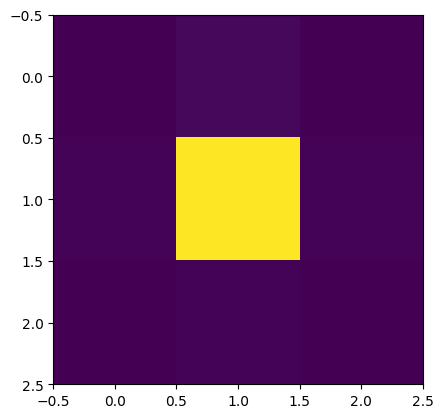

In [8]:
# Define a Structuring Element
element = np.array([[0,2,0],
                    [1,88,1],
                    [0,1,0]])

# Show a structuring Element 
plt.imshow(element)

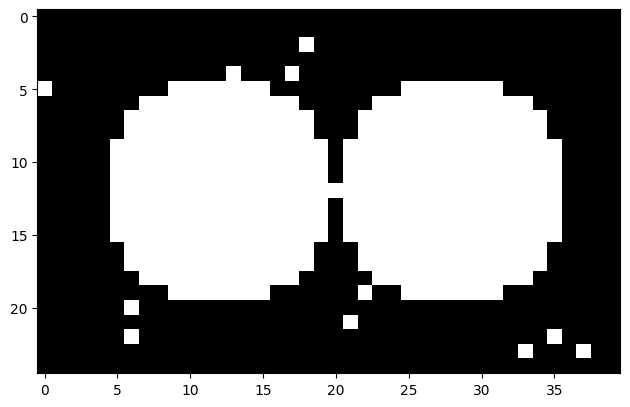

In [13]:
""" Create two adjacent circles  """
#  Create Canvas for Image 
circle_image = np.zeros((25, 40))
# Cretae two disks with center (,) and radius 8 and set their pixel to white 1
circle_image[disk((12, 12), 8)] = 1
circle_image[disk((12, 28), 8)] = 1
# Set random pixels to 1, to simulate noise 
for x in range(20):
   circle_image[np.random.randint(25), np.random.randint(40)] = 1

# View Image
imshow(circle_image)


Text(0.5, 1.0, 'Dilated Image')

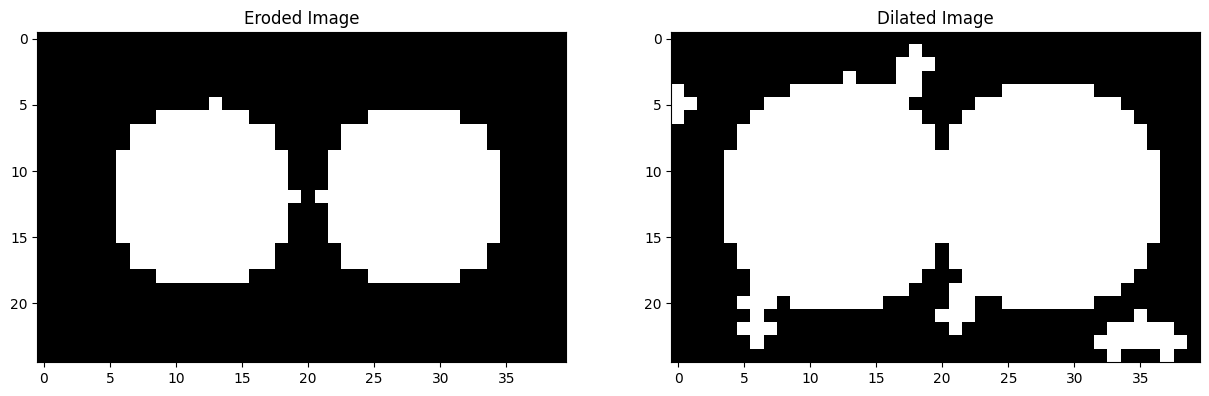

In [14]:
# Apply Erosion and Dilation
img_erosion= erosion(circle_image, element)
img_dilation = dilation(circle_image, element)
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].imshow(img_erosion, cmap='gray')

ax[0].set_title('Eroded Image')

ax[1].imshow(img_dilation, cmap='gray')
ax[1].set_title('Dilated Image')

Text(0.5, 1.0, 'Multi-Dilated Image')

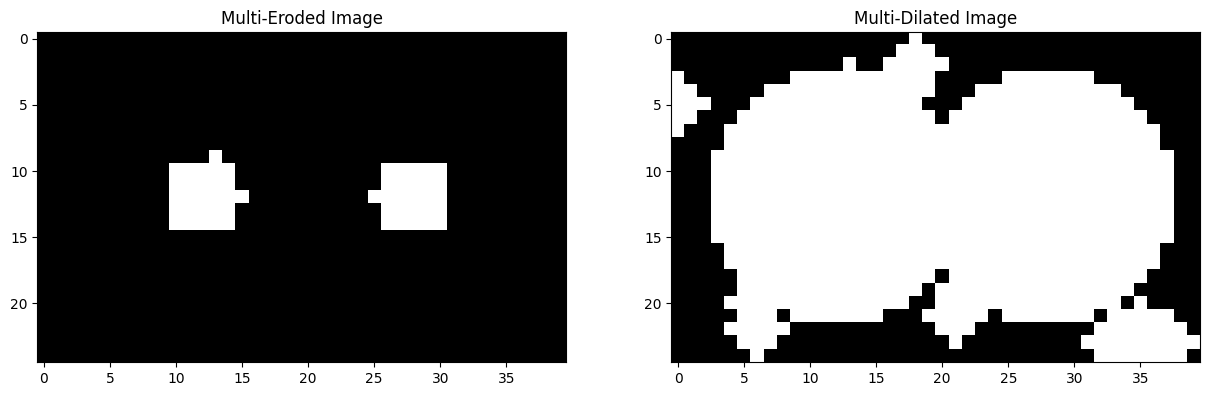

In [17]:
# Apply multiple dilations

def multi_dil(im, num, element=element):
    for i in range(num):
        im = dilation(im, element)
    return im

# Apply Multiple Erosions

def multi_ero(im, num, element=element):
    for i in range(num):
        im = erosion(im, element)
    return im

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(multi_ero(circle_image, 5, element), cmap='gray')
ax[0].set_title('Multi-Eroded Image')
ax[1].imshow(multi_dil(circle_image, 2, element), cmap='gray')
ax[1].set_title('Multi-Dilated Image')

Text(0.5, 1.0, 'Closed Image')

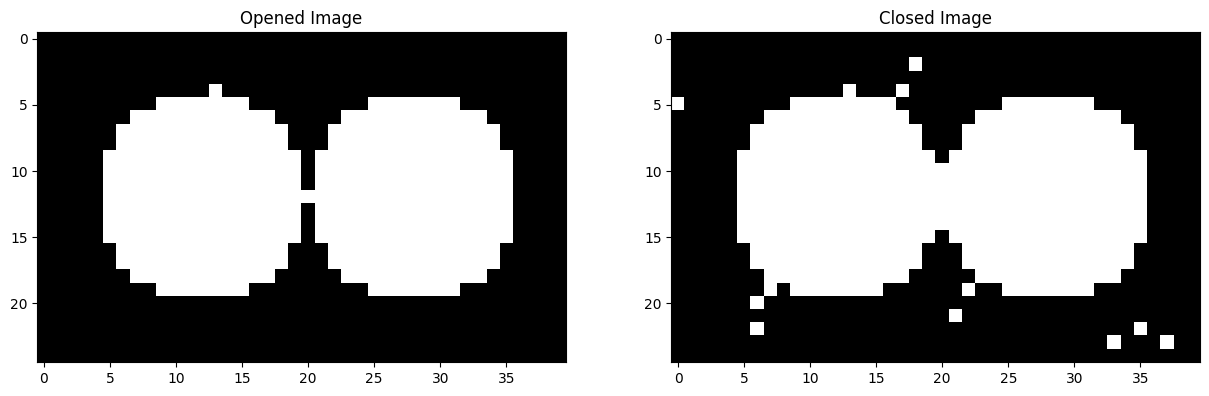

In [18]:
# Apply Opening ( Erosion followed by Dilation )
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].imshow(opening(circle_image, element), cmap='gray')
ax[0].set_title('Opened Image')

ax[1].imshow(closing(circle_image, element), cmap='gray')
ax[1].set_title('Closed Image')

Text(0.5, 1.0, 'Binarized Image')

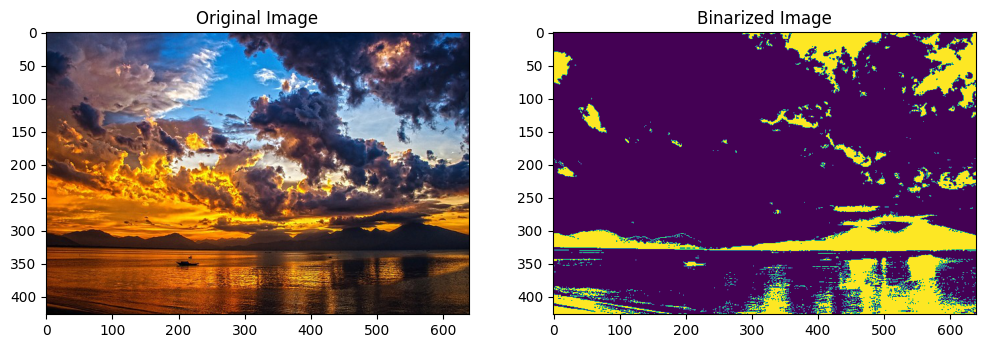

In [19]:
# Apply on real Image
# 1 : Random Image
# Read Image file
paysage = imread('Paysage.jpg')
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(paysage);
ax[0].set_title('Original Image')


binary = rgb2gray(paysage)<0.15
ax[1].imshow(binary)
ax[1].set_title('Binarized Image')

In [30]:
# Define a Structuring Element
element = np.array([[0,0,0,0,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0]])

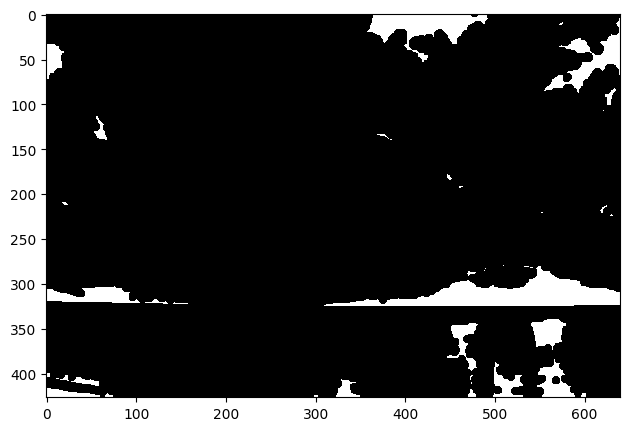

In [31]:
# Apply multiple erosions of binary image
multi_eroded = multi_ero(binary, 2, element)
imshow(multi_eroded)

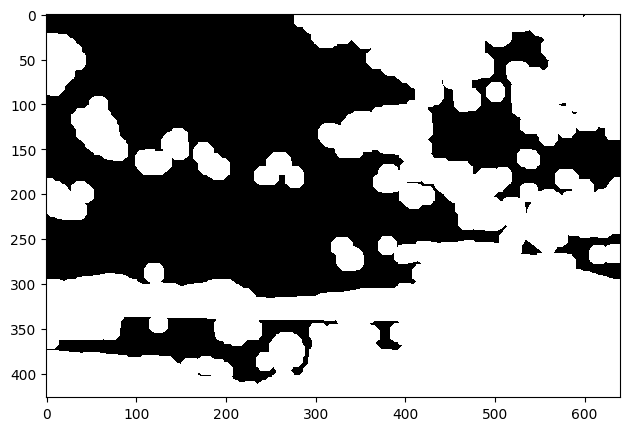

In [27]:
# Apply multiple dilations of binary image

multi_dilated= multi_dil(binary, 5, element)
imshow(multi_dilated)

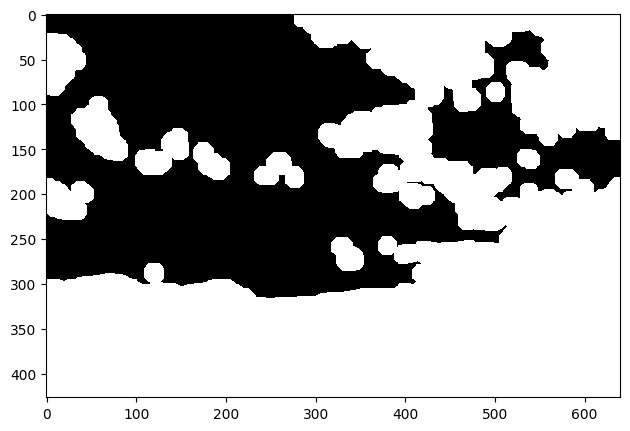

In [34]:
# Apply Area opening

area_morphed = area_closing(area_closing(multi_dilated, 1000), 11000)
imshow(area_morphed)

Text(0.5, 1.0, 'Binarized Image')

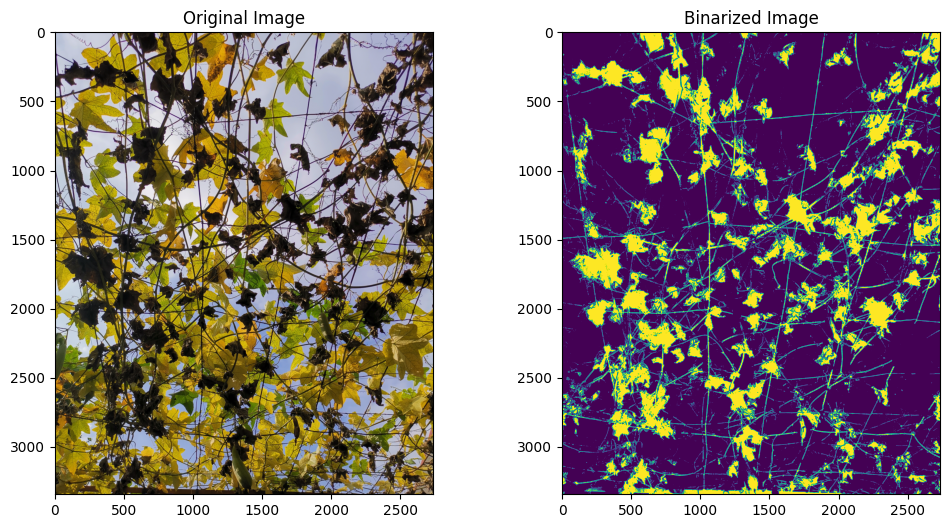

In [36]:
# Different Image 
# Image with Lattice frame

# Apply on real Image
# Read Image file
leaves = imread('leaves.jpg')
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(leaves)
ax[0].set_title('Original Image')


binary = rgb2gray(leaves)<0.15
ax[1].imshow(binary)
ax[1].set_title('Binarized Image')


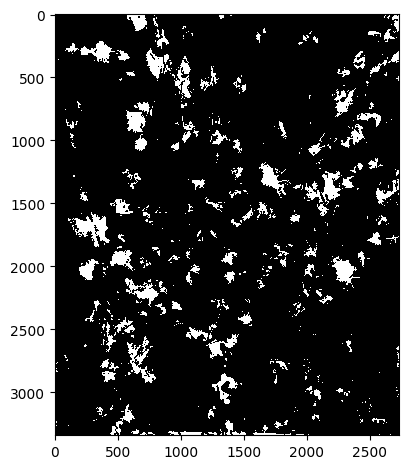

In [38]:
# Define structuring element

element = np.array([[0,0,0,0,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,0,0,0,0]])


# Multiple erosion
multi_eroded = multi_ero(binary, 2, element)
imshow(multi_eroded)

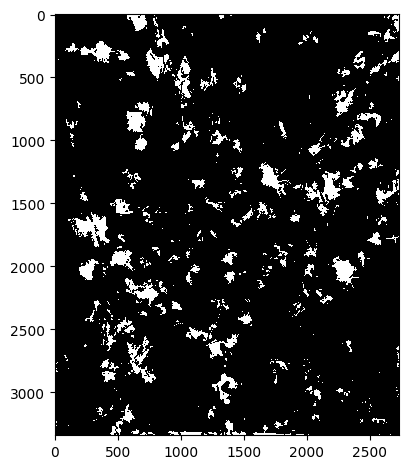

In [39]:
# Opening

opened = opening(multi_eroded)
imshow(opened)

### 2. Morphological Image Processing using CV2


In [10]:
import cv2  
import numpy as np

In [42]:
# Read Image
image = cv2.imread("leaves.jpg")

# Define Structuring Element 
str_element= np.ones((25, 25), np.uint8)

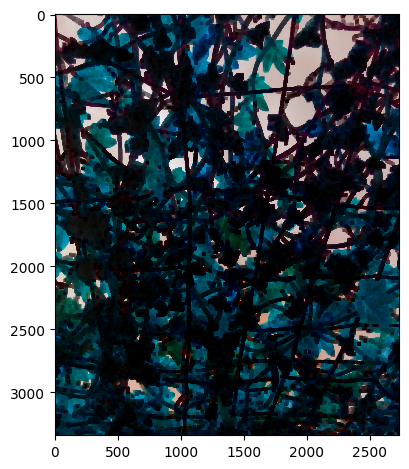

In [50]:
# Erosion
# Using cv2.erode() method 
image_erode = cv2.erode(image, str_element)


filename = 'image_eroded1.jpg'
# Using cv2.imwrite() method
# Save img
cv2.imwrite(filename, image_erode)
# View
imshow(image_erode)

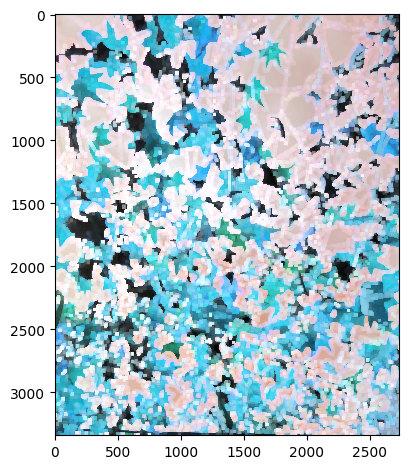

In [51]:
# Dilation

# Using cv2.erode() method 
image_dilation = cv2.dilate(image, str_element)


filename = 'image_dilation1.jpg'
# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, image_dilation)
# View
imshow(image_dilation)

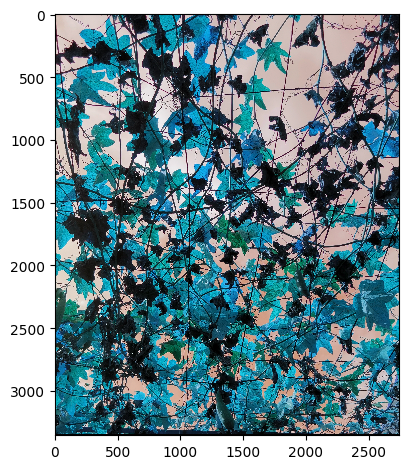

In [52]:
# Create a border for Image 

# Using cv2.copyMakeBorder() method
image_border = cv2.copyMakeBorder(image, 5, 5, 5, 5, cv2.BORDER_CONSTANT, None, value = 2)


filename = 'image_border1.jpg'
# Save the image
cv2.imwrite(filename, image_border)
imshow(image_border)

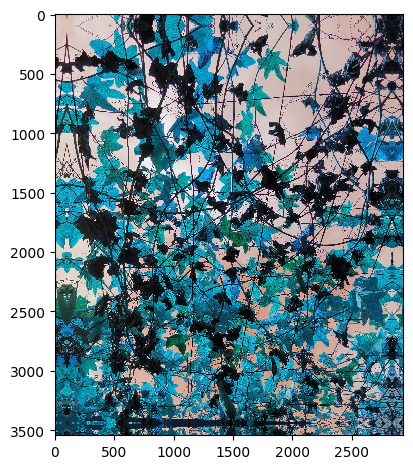

In [54]:
# Make Mirrored Border
image_border_mirr = cv2.copyMakeBorder(image, 100, 100, 100, 100, cv2.BORDER_REFLECT)

filename = 'image_border_mirrored.jpg'
# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, image_border_mirr)
imshow(image_border_mirr)


<ipython-input-59-a467beec5aa6>:7: RuntimeWarning: divide by zero encountered in log
  log_transformed = np.array(c * np.log(1 + image), dtype = np.uint8)


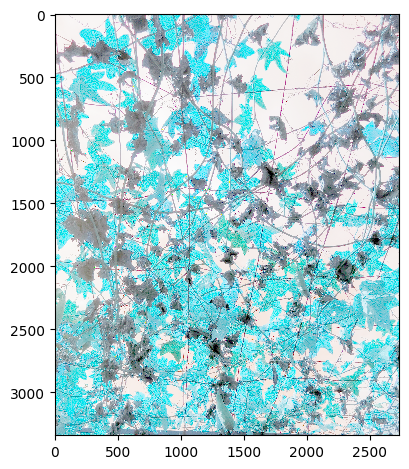

In [59]:
"""Intensity Transformations """
# Log transformation

# Apply log transform.
c = 255/(np.log(1 + np.max(image)))

log_transformed = np.array(c * np.log(1 + image), dtype = np.uint8)

cv2.imwrite('log_transformed.jpg', log_transformed)
imshow(log_transformed)

/usr/local/lib/python3.9/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


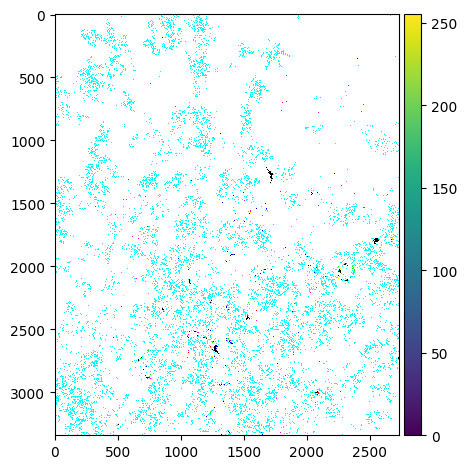

In [61]:
# Linear Transformation

def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2
# Define parameters.
r1 = 7
s1 = 89
r2 = 190
s2 = 255
# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)
# Apply contrast stretching.
contrast_stretch = pixelVal_vec(image, r1, s1, r2, s2)
# Save edited image.
cv2.imwrite('contrast_stretch.jpg', contrast_stretch)
imshow(contrast_stretch)

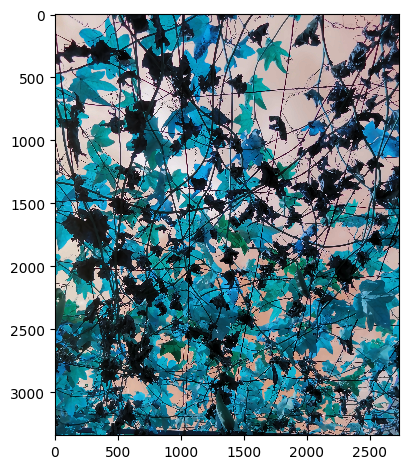

In [62]:
# Image Denoising 

denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 12, 10, 8, 15)

# Save edited image.
cv2.imwrite('denoised_image.jpg', denoised_image)
imshow(denoised_image)

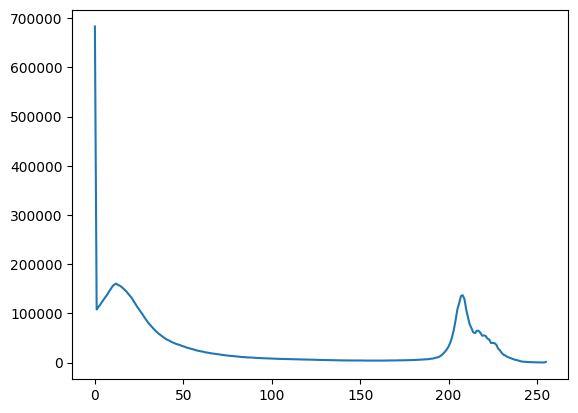

In [63]:
"""Histgograms help understand gray level occurence in an image"""
# Calculate Histogram for Colored Image
histr = cv2.calcHist([image],[0],None,[256],[0,256])
plt.plot(histr)

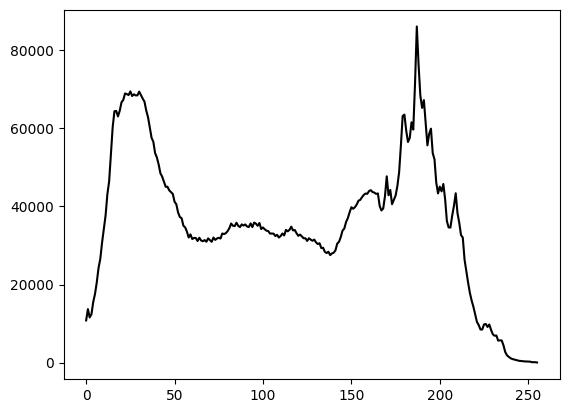

In [64]:
# Calculate Histogram for gray image

grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
histogram = cv2.calcHist([grey_image], [0], None, [256], [0, 256])
plt.plot(histogram, color='k')